# **1. Perkenalan Dataset**


## **Online Sales Dataset: Online Shopping Patterns and Retail Performance Dataset**

----

Dataset Online Sales Dataset pada platform Kaggle berisi data transaksi penjualan e-commerce/global retail yang dapat digunakan untuk berbagai analisis penjualan, perilaku konsumen, tren penjualan, dan lain-lain. Model digunakan untuk memprediksi kemungkinan pengembalian barang (Return) berdasarkan karakteristik transaksi

Dataset ini berasal dari Kaggle. Berikut ini link datasetnya:
https://www.kaggle.com/datasets/yusufdelikkaya/online-sales-dataset?select=online_sales_dataset.csv

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Load data
url='https://drive.google.com/uc?id=1BApsWpRIXgOS9K2IntvleX4XA7DK0WNh'
df = pd.read_csv(url)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [3]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [4]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,49782.000000,49782.000000,49782.000000,44804.000000,49782.000000,47293.000000
mean,550681.239946,22.372343,47.537862,55032.871775,0.275748,17.494529
std,260703.009944,17.917774,33.479510,25913.660157,0.230077,7.220557
min,100005.000000,-50.000000,-99.980000,10001.000000,0.000000,5.000000
25%,324543.000000,11.000000,23.592500,32750.750000,0.130000,11.220000
50%,552244.000000,23.000000,48.920000,55165.000000,0.260000,17.500000
75%,776364.000000,37.000000,74.610000,77306.250000,0.380000,23.720000
max,999997.000000,49.000000,100.000000,99998.000000,1.999764,30.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

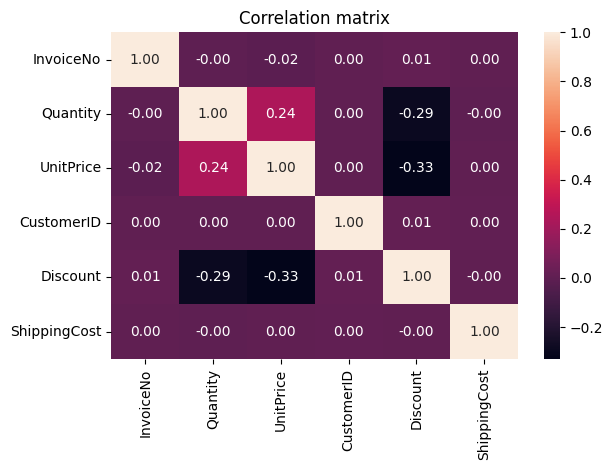

In [5]:
# Visualisasi yang lebih informatif
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation matrix')
plt.tight_layout()

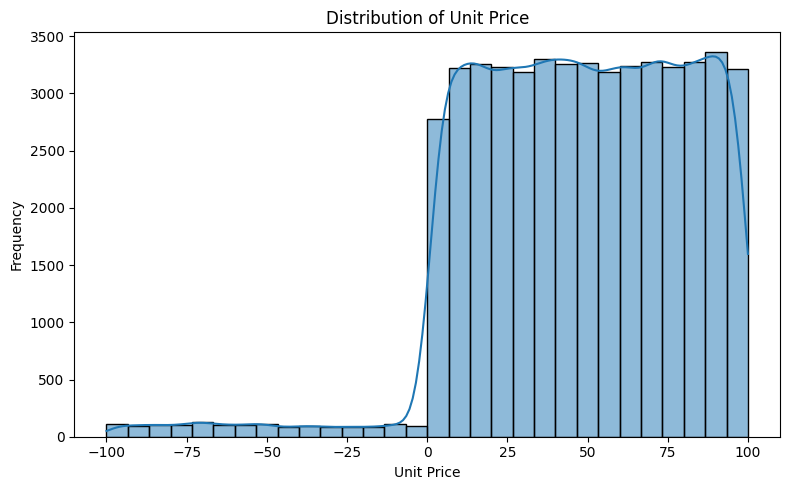

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['UnitPrice'], bins=30, kde=True)

plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


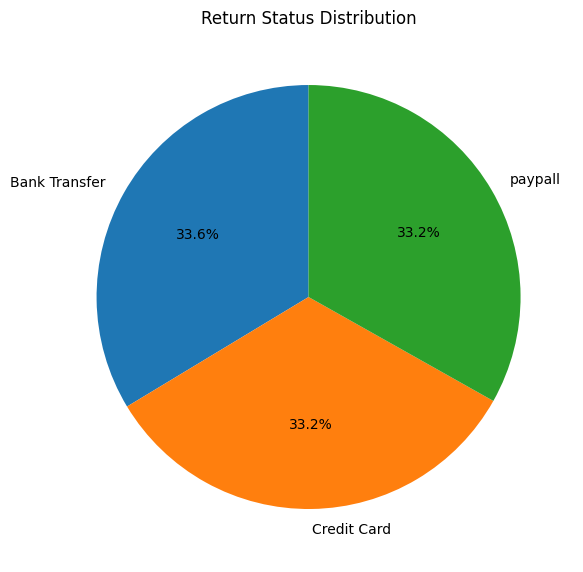

In [7]:
# Hitung jumlah tiap status
return_counts = df['PaymentMethod'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    return_counts.values,
    labels=return_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Return Status Distribution')
plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### Menghapus atau Menangani Data Kosong (Missing Values)

In [8]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,4978
Country,0
Discount,0
PaymentMethod,0


In [9]:
df.dropna(subset=['WarehouseLocation'], inplace=True)
df = df.drop(columns=[
    'InvoiceNo',
    'StockCode',
    'InvoiceDate',
    'CustomerID'
])

df.isnull().sum()

,0
Description,0
Quantity,0
UnitPrice,0
Country,0
Discount,0
PaymentMethod,0
ShippingCost,0
Category,0
SalesChannel,0
ReturnStatus,0


### Menghapus Data Duplikat

In [10]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.duplicated().sum()

np.int64(0)

### Deteksi dan Penanganan Outlier

In [11]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier
num_cols = df.select_dtypes(include=[np.number]).columns
outlier_index = set()

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # baris outlier untuk kolom ini
    idx = df[(df[col] < lower) | (df[col] > upper)].index
    outlier_index.update(idx)

print(f"Total outlier unik: {len(outlier_index)}")
df_out_drop = df.drop(index=outlier_index)

Total outlier unik: 0


Berdasarkan metode IQR, tidak ditemukan outlier signifikan pada fitur numerik sehingga tidak dilakukan penghapusan data pada tahap ini.

### Binning (Pengelompokan Data)

In [12]:
df['Quantity_Group'] = pd.cut(
    df['Quantity'],
    bins=[0, 15, 35, df['Quantity'].max()],
    labels=['Low', 'Medium', 'High']
)

df.head()

,Description,Quantity,UnitPrice,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,Quantity_Group
0,White Mug,38,1.71,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,High
1,White Mug,18,41.25,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,Medium
2,Headphones,49,29.11,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,High
3,Desk Lamp,14,76.68,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,Low
5,Office Chair,47,70.16,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium,High


### Encoding Data Kategorikal

In [17]:
numerical_features = ['Quantity', 'UnitPrice', 'ShippingCost', 'Discount']

categorical_features = [
    'Description', 'Country', 'PaymentMethod', 'Category',
    'SalesChannel', 'ShipmentProvider',
    'OrderPriority', 'ReturnStatus',
    'WarehouseLocation', 'Quantity_Group']

In [19]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols: df[col] = df[col].astype('category').cat.codes

quantity_map = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

df['Quantity_Group'] = df['Quantity_Group'].map(quantity_map)

df.head()

,Description,Quantity,UnitPrice,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,Quantity_Group
0,9,38,1.71,0,0.47,0,10.79,1,0,0,3,2,2,2
1,9,18,41.25,8,0.19,2,9.51,2,1,0,3,4,2,1
2,3,49,29.11,3,0.35,0,23.03,2,1,1,3,1,0,2
3,2,14,76.68,5,0.14,2,11.08,0,1,0,2,4,1,0
5,5,47,70.16,9,0.48,1,13.98,2,1,0,0,2,2,2


In [20]:
df.to_csv('online_sales_preprocessed.csv', index=False)